In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/amazon-alexa"))

# Any results you write to the current directory are saved as output.

['amazon_alexa.tsv']


Using rstrip() plus a list comprehension to get a list of all the lines of text reviews.

In [15]:
df_review = [line.rstrip() for line in open('../input/amazon-alexa/amazon_alexa.tsv')]
print (len(df_review))

3151


In [16]:
import pandas
df_review = pandas.read_csv('../input/amazon-alexa/amazon_alexa.tsv', sep='\t')
df_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
df_review.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [18]:
df_review.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [19]:
df_review['length'] = df_review['verified_reviews'].apply(len)
df_review.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

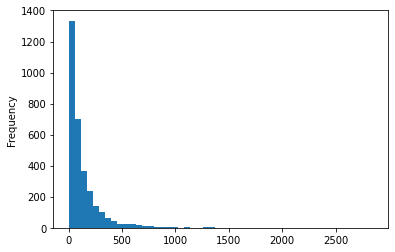

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df_review['length'].plot(bins=50, kind='hist')

In [21]:
df_review.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [22]:
df_review[df_review['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

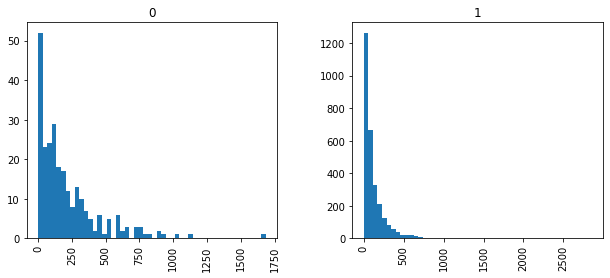

In [23]:
df_review.hist(column='length', by='feedback', bins=50,figsize=(10,4))

In [24]:
words = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
words

[]

In [25]:
from collections import Counter
words_counts = Counter(words)
print(words_counts)

Counter()


In [26]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[]

In [27]:
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

In [38]:
import seaborn as sns
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(20), most_commmom_CountList[0:20])
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20), most_commmom_wordList[0:20], fontsize=20, rotation=40)
plt.title('Most Common Word used in Review.', fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Grouper and axis must be same length

<Figure size 1440x1296 with 0 Axes>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# Importing the dataset
dataset = pd.read_csv('../input/amazon-alexa/amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [40]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [41]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [42]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [46]:
cm

array([[ 18,  36],
       [  0, 576]])

In [47]:
print((cm[0,0]+cm[1,1])/cm.sum()*100)

94.28571428571428


In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#fitting train data in the classifier
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train)




0.5892857142857143

In [49]:
#Testing our classifier onto test data and storing the results in y_pred variable
y_pred = classifier.predict(X_test)
#Checking accuracy of predictions on test data
#We are using confusion matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print((cm[0,0]+cm[1,1])/cm.sum()*100)
cm

53.492063492063494


array([[ 32,  22],
       [271, 305]])

In [50]:
#Modelling a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy',random_state=0)

#Training the classifier
classifier2.fit(X_train,y_train)
classifier2.score(X_train,y_train)

0.9912698412698413

In [52]:
#Prediction over test data
x_pred2 = classifier2.predict(X_test)

In [55]:
#Check accuracy
cm = confusion_matrix(y_test,x_pred2)
print((cm[0,0]+cm[1,1])/cm.sum()*100)
cm

94.28571428571428


array([[ 28,  26],
       [ 10, 566]])

Above shown matrix is known as confusion matrix and below is my result with accuracy of 94.28% and F1 Score of 0.9696.The Random Classifier Algo with 100 trees works efficiently to train the machine in predicting positive and negative reviews.